In [ ]:
#-----------------------------------UBER  RIDES DATA  ANALYSIS  USING  PYTHON----------------------------------------------------

In [ ]:
#Importing Libraries
#The analysis will be done using the following libraries : 

#Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
#Numpy: Numpy arrays are very fast and can perform large computations in a very short time.
#Matplotlib / Seaborn: This library is used to draw visualizations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data set


In [4]:
dataset = pd.read_csv("UberDataset .csv")
dataset.head()
 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
#from the above observation ther is a lot of null value in purpose column
# So for that we will fill the null value with "NOT' keyword

In [7]:
dataset['PURPOSE'].fillna("NOT",inplace=True)

In [12]:
# changing the START_DATE and END_DATE to the date-time Format foor the further analysis

In [13]:
# splitting the START_DATE into the date and time column and converting the time into four categories

In [9]:
# Convert to datetime, setting errors='coerce' to handle bad data
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Drop rows where conversion failed
dataset = dataset.dropna(subset=['START_DATE'])

# Now extract date and time components
dataset['date'] = dataset['START_DATE'].dt.date
dataset['time'] = dataset['START_DATE'].dt.hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [10]:
dataset.dropna(inplace=True)

In [12]:
dataset.head(20)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Evening
6,2016-01-06 17:30:00,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17,Evening
7,2016-01-07 13:27:00,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting,2016-01-07,13,Afternoon
8,2016-01-10 08:05:00,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8,Morning
9,2016-01-10 12:17:00,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12,Afternoon


In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Evening
6,2016-01-06 17:30:00,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17,Evening
7,2016-01-07 13:27:00,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting,2016-01-07,13,Afternoon
8,2016-01-10 08:05:00,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8,Morning
9,2016-01-10 12:17:00,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12,Afternoon


In [19]:
obj=(dataset.dtypes =='object')
object_cols= list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values

{'END_DATE': 414,
 'CATEGORY': 2,
 'START': 108,
 'STOP': 112,
 'PURPOSE': 7,
 'date': 113}

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

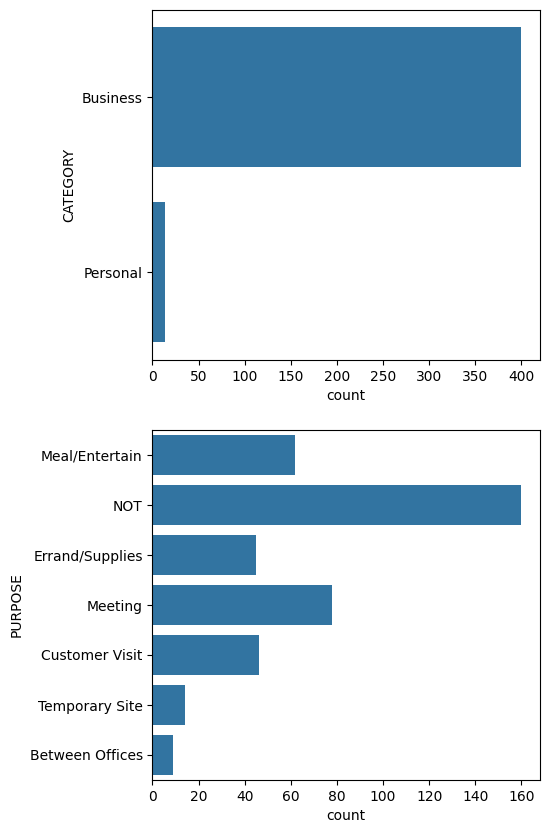

In [31]:
plt.figure(figsize=(5,10))

plt.subplot(2,1,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=0)

plt.subplot(2,1,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=0)


([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(0, 1, 'Afternoon'),
  Text(0, 2, 'Evening'),
  Text(0, 3, 'Night')])

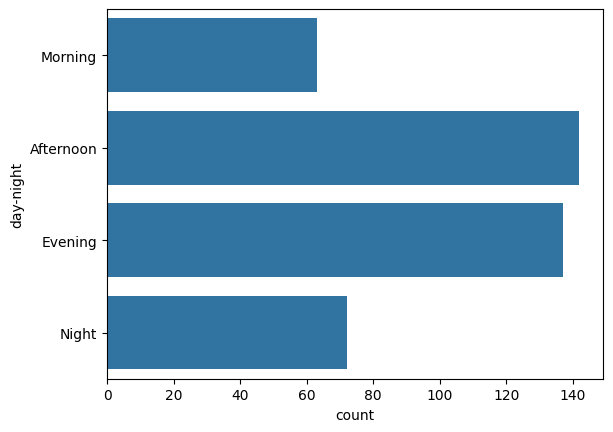

In [30]:
# this is used to count the labels in columns appear how many time
sns.countplot(dataset['day-night'])
plt.yticks(rotation=0)

In [ ]:
# this is for camparing the purpose with respect to purpose

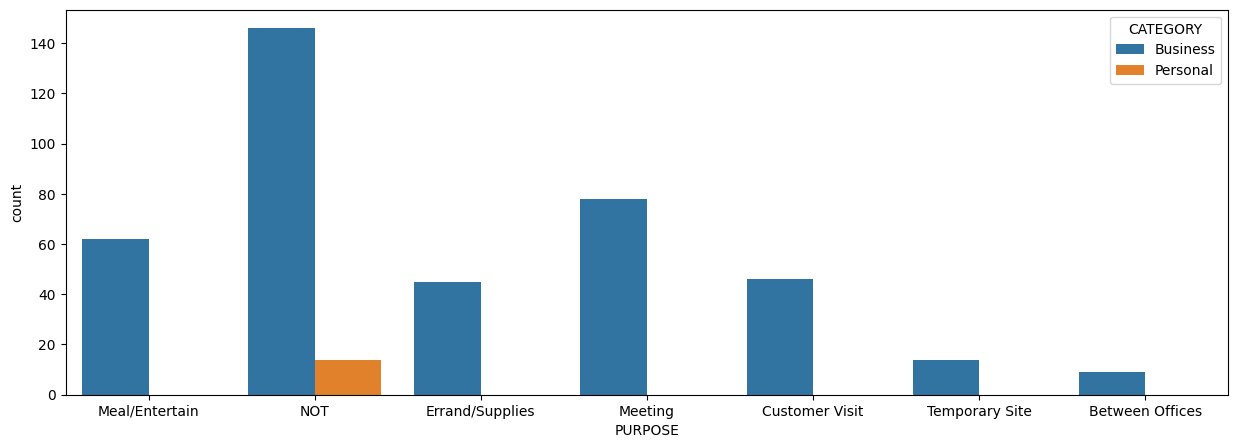

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Insights from the above count-plots : 
#Most of the rides are booked for business purpose.
##Most of the people book cabs for Meetings and Meal / Entertain purpose.
#Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

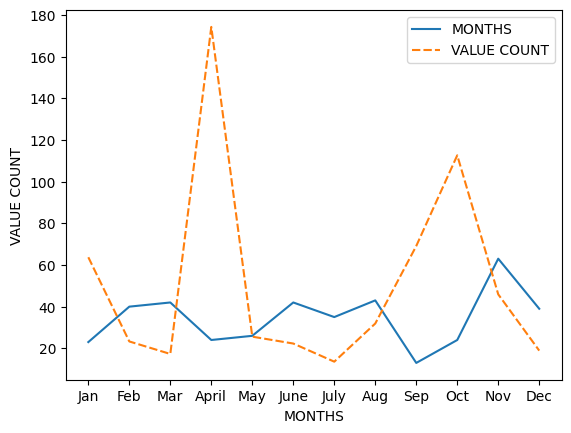

In [34]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [ ]:
#Insights from the above plot : 
#The counts are very irregular.
#Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

In [ ]:
# Visualization for Days Data

In [35]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

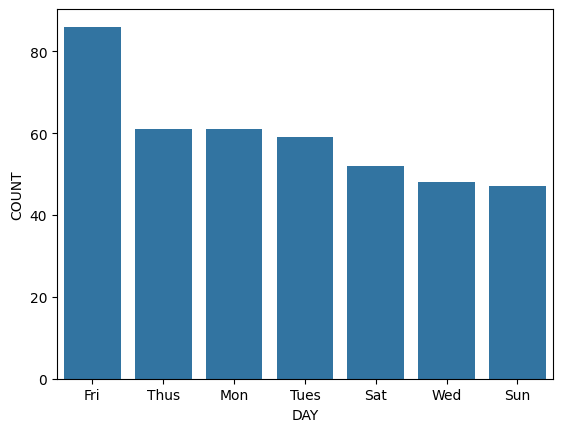

In [36]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


In [ ]:
#lets create Boxplot

<Axes: ylabel='MILES'>

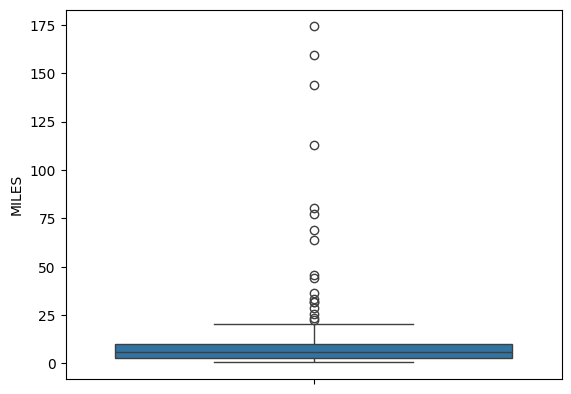

In [37]:
sns.boxplot(dataset['MILES'])


<Axes: ylabel='MILES'>

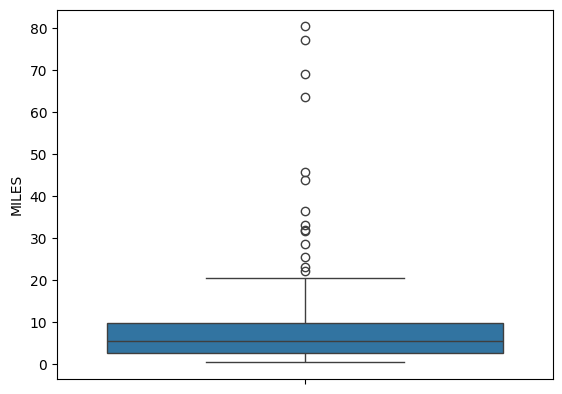

In [38]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])


In [ ]:
#EXplanation : it’s bit visible. But to get more clarity we can use distplot for values less than 40.

C:\Users\Anurag Jaiswar\AppData\Local\Temp\ipykernel_18380\615779499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

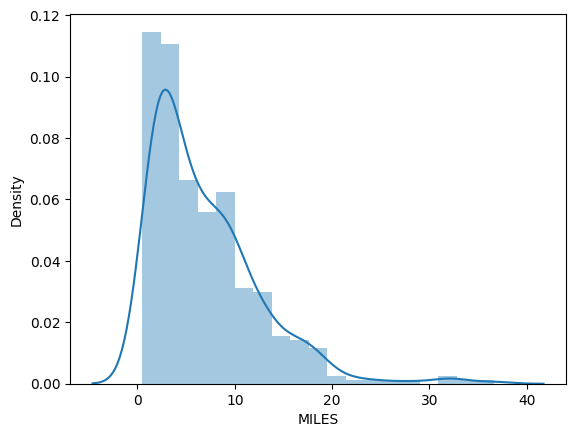

In [40]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])


In [ ]:
#Insights from the above plots :
#Most of the cabs booked for the distance of 4-5 miles.
#Majorly people chooses cabs for the distance of 0-20 miles.
#For distance more than 20 miles cab counts is nearly negligible.